<a href="https://colab.research.google.com/github/comindspace/noosphere/blob/main/colab/LightRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q lightrag-hku
!pip install -q aioboto3
!pip install -q tiktoken
!pip install -q nano_vectordb
!pip install -q neo4j
!pip install -q oracledb
!pip install -q ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import logging
import os
import nest_asyncio
from lightrag import LightRAG, QueryParam
from lightrag.llm import ollama_model_complete, ollama_embedding
from lightrag.utils import EmbeddingFunc

In [ ]:
nest_asyncio.apply()

In [ ]:
OLLAMA_HOST = 'http://localhost:11434'

In [ ]:
!wget 'https://raw.githubusercontent.com/comindspace/noosphere/refs/heads/main/prepared_data/questions0-79.zip'

--2024-12-10 13:53:06--  https://raw.githubusercontent.com/comindspace/noosphere/refs/heads/main/prepared_data/questions0-79.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2771801 (2.6M) [application/zip]
Saving to: ‘questions0-79.zip’

questions0-79.zip   100%[===================>]   2.64M  --.-KB/s    in 0.04s   

2024-12-10 13:53:06 (62.6 MB/s) - ‘questions0-79.zip’ saved [2771801/2771801]



In [ ]:
!unzip './questions0-79.zip' -d "./questions/"

Archive:  ./questions0-79.zip
  inflating: ./questions/0.txt       
  inflating: ./questions/1.txt       
  inflating: ./questions/10.txt      
  inflating: ./questions/11.txt      
  inflating: ./questions/12.txt      
  inflating: ./questions/13.txt      
  inflating: ./questions/14.txt      
  inflating: ./questions/15.txt      
  inflating: ./questions/16.txt      
  inflating: ./questions/17.txt      
  inflating: ./questions/18.txt      
  inflating: ./questions/19.txt      
  inflating: ./questions/2.txt       
  inflating: ./questions/20.txt      
  inflating: ./questions/21.txt      
  inflating: ./questions/22.txt      
  inflating: ./questions/23.txt      
  inflating: ./questions/24.txt      
  inflating: ./questions/25.txt      
  inflating: ./questions/26.txt      
  inflating: ./questions/27.txt      
  inflating: ./questions/28.txt      
  inflating: ./questions/29.txt      
  inflating: ./questions/3.txt       
  inflating: ./questions/30.txt      
  inflating: ./quest

In [ ]:
all_questions_and_answers=pd.read_csv('https://raw.githubusercontent.com/comindspace/noosphere/refs/heads/main/prepared_data/frames.csv')

In [ ]:
df = all_questions_and_answers[['Prompt','Answer']].loc[0:79].copy()

In [ ]:
idx=15

In [ ]:
WORKING_DIR = f"./lightrag_workdir/{idx}"
if not os.path.exists(WORKING_DIR):
    os.makedirs(WORKING_DIR, exist_ok=True)

In [ ]:
rag = LightRAG(
    working_dir=WORKING_DIR,
    llm_model_func=ollama_model_complete,
    llm_model_name="qwen2.5:14b-instruct-q5_K_M",
    llm_model_max_async=4,
    llm_model_max_token_size=30000,
    llm_model_kwargs={"host": "http://friston.gpu.comind.space:11434", "options": {"num_ctx": 30000}},
    embedding_func=EmbeddingFunc(
        embedding_dim=768,
        max_token_size=8192,
        func=lambda texts: ollama_embedding(
            texts, embed_model="nomic-embed-text", host="http://62.68.146.206:11434"
        ),
    ),
)

In [ ]:
with open(f"/content/questions/{idx}.txt", "r", encoding="utf-8") as f:
    rag.insert(f.read())

Extracting entities from chunks:   0%|          | 0/5 [00:00<?, ?chunk/s]

Extracting entities from chunks:  20%|██        | 1/5 [01:20<05:23, 80.83s/chunk]

Extracting entities from chunks:  40%|████      | 2/5 [02:46<04:11, 83.70s/chunk]

Extracting entities from chunks:  60%|██████    | 3/5 [06:20<04:46, 143.16s/chunk]

Extracting entities from chunks:  80%|████████  | 4/5 [07:19<01:49, 109.84s/chunk]

Generating embeddings: 100%|██████████| 3/3 [00:10<00:00,  3.43s/batch]


In [ ]:
query=df['Prompt'].loc[idx]
query

'In Slovakia there is a well known Film Festival called the Bratistlava International Film Festival. What city/ town was the film editor for the Grand Prix winner of 2003 born in?'

In [ ]:
#query = "If my future wife has the same first name as the 15th first lady of the United States' mother and her surname is the same as the second assassinated president's mother's maiden name, what is my future wife's name?"
response1 = rag.query(query, param=QueryParam(mode="naive"))
response1

'### Response\n\nThe Bratislava International Film Festival (also known as Bratislava IFF) is an annual event that takes place in Bratislava, Slovakia. In 2003, the festival awarded its Grand Prix to "Boredom in Brno" ("Nuda v Brne"), a Czech comedy film directed by Vladimír Moravec.\n\nThe film "Boredom in Brno" was edited by Jirě Brožek. According to his biography:\n\nJirě Brožek (born March 11, 1947) is a Czech film editor who has worked on more than one hundred feature films and many TV series throughout his career.\n\nNo specific information about the birthplace of Jirě Brožek in any provided documents. However, considering he\'s a well-known figure in the Czech Republic\'s film industry and given that no mention exists indicating otherwise, it is highly likely that he was born within the territory of the modern-day Czech Republic. Nonetheless, without explicit detail, pinpointing his exact city or town of birth isn\'t possible based solely on the provided information.\n\nTo concl

In [ ]:
response2 = rag.query(query, param=QueryParam(mode="local"))
response2

{
  "high_level_keywords": ["Film festival", "Grand Prix winner", "Birthplace"],
  "low_level_keywords": ["Slovakia", "Bratislava International Film Festival", "2003", "Film editor"]
}


'The Bratislava International Film Festival (Bratislava IFF) is an annual event that celebrates international cinema and has been held since 1999 in Bratislava, Slovakia. The festival features various categories of awards and recognizes outstanding contributions to film from around the world.\n\nIn 2003, the Grand Prix was awarded to the Czech comedy film "Bored in Brno" (Czech: Nuda v Brne), directed by Vladimír Morávek. This film also earned Katerina Holbnová the Best Actress award for her performance in it.\n\nJiří Brožek, who is a renowned Czech film editor, was responsible for editing "Bored in Brno." Jirн Broћek was born on March 11, 1947. He studied Editing and Directing at FAMU (the Academy of Performing Arts in Prague) between 1967-1973.\n\nTherefore, the film editor for the Grand Prix winner of 2003, Jirн Broћek, was born in Prague, which is the capital city of the Czech Republic.'

In [ ]:
response3 = rag.query(query, param=QueryParam(mode="global"))
response3

{
  "high_level_keywords": ["Film festival", "Grand Prix winner", "Birthplace"],
  "low_level_keywords": ["Slovakia", "Bratislava International Film Festival", "2003", "Film editor"]
}


'### Information on the 2003 Grand Prix Winner and Its Film Editor\n\nThe Bratislava International Film Festival (Bratislava IFF) is a significant annual event that showcases international cinema, established in 1999. It presents awards across multiple categories, including the prestigious Grand Prix for Best Film.\n\nIn 2003, Vladimír Morávek\'s film "Boredom in Brno" (Nuda v Brne) won the Grand Prix at the Bratislava IFF. The film is a Czech comedy directed by Vladimír Morávek and was filmed primarily in Brno, a city in the Czech Republic.\n\n### Details on Vladimír Morávek\n\nVladimír Morávek, who directed "Boredom in Brno," is a notable Czech film director. However, the specific birthplace of Vladimír Morávek is not provided directly within the given data.\n\nThe provided information focuses more on Jirн Broћek, a renowned Czech film editor, rather than the director of the 2003 Grand Prix-winning film. Jirн Broћek\'s place of birth and extensive career details are available, but th

In [ ]:
response4 = rag.query(query, param=QueryParam(mode="hybrid"))
response4

{
  "high_level_keywords": ["Film festival", "Grand Prix winner", "Birthplace"],
  "low_level_keywords": ["Slovakia", "Bratislava International Film Festival", "2003", "Film editor"]
}


'### Overview\n\nThe **Bratislava International Film Festival (IFF)** is an annual international event established in 1999, held in Bratislava, Slovakia. This festival has a long history of recognizing and celebrating talented filmmakers from around the world.\n\nIn 2003, one of the significant winners at this festival was **Vladimír Morávek**, whose film "Bored in Brno" won the Grand Prix for Best Film. Vladimír Morávek is a Czech director and filmmaker known for his work on various films.\n\n### The Winner: Vladimír Morávek\n\n**Vladimír Morávek\'s "Bored in Brno"** not only received acclaim at the 2003 Bratislava IFF, but also went on to win five Czech Lion awards, including Best Film and Best Director. The film is a comedy set in Brno, a city located in the Czech Republic.\n\n### Editing Team\n\nThe editing of "Bored in Brno" was handled by **Jirн Broћek**, a renowned Czech film editor who has edited over 100 feature films throughout his career. Jirн Broћek is particularly noted fo

In [ ]:
file_path = './dataframe_data.csv'

In [ ]:
if os.path.exists(file_path):
    lightrag_result = pd.read_csv(file_path, index_col=0)
else:
    lightrag_result = pd.DataFrame(columns = ['idx', 'naive', 'local', 'global', 'hybrid','query'])

In [ ]:
new_data = {
    'idx': idx,
    'naive': response1,
    'local': response2,
    'global': response3,
    'hybrid': response4,
    'quary': query,
}

if new_data['idx'] not in lightrag_result['idx'].values:
    lightrag_result = pd.concat([lightrag_result, pd.DataFrame([new_data])], ignore_index=True)

In [ ]:
lightrag_result.to_csv(file_path)

In [ ]:
questions_answers_results=pd.read_csv('./dataframe_data.csv')

In [ ]:
questions_answers_results['Golden_Answer']=df['Answer']

In [ ]:
questions_answers_results.to_csv('./questions_answers_results_lightrag.csv', index=False)

In [ ]:
def evaluate_answers(df, llm):
    prompt_template = """
    ===Task===
    I need your help in evaluating an answer provided by an LLM against a ground truth answer. Your task is to determine if the ground truth answer is present in the LLM’s response. Please analyze the provided data and make a decision.
    ===Instructions===
    1. Carefully compare the "Predicted Answer" with the "Ground Truth Answer".
    2. Consider the substance of the answers – look for equivalent information or correct answers. Do not focus on exact wording unless the exact wording is crucial to the meaning.
    3. Your final decision should be based on whether the meaning and the vital facts of the "Ground Truth Answer" are present in the "Predicted Answer:"

    ===Input Data===
    - Question: «{question}»
    - Predicted Answer: «{answer}»
    - Ground Truth Answer: «{ground_truth}»

    ===Output Format===
    Provide your final evaluation in the following format:
    "Explanation:" (How you made the decision?)
    "Decision:" ("TRUE" or "FALSE" )

    Please proceed with the evaluation.
    """

    evaluations = []

    for index, row in df.iterrows():
        prompt = prompt_template.format(
            question=row['Question'],
            # answer=row['naive'],
            # answer=row['local'],
            # answer=row['global'],
            answer=row['hybrid'],
            ground_truth=row['Golden_Answer']
        )
        response = llm.invoke(prompt)
        evaluations.append({
            'question': row['Question'],
            # 'answer': row['naive'],
            # 'answer: row['local'],
            # 'answer: row['global'],
            'answer:' row['hybrid'],
            'ground_truth': row['Golden_Answer'],
            'evaluation': response
        })

    new_df = pd.DataFrame(evaluations)
    return new_df

In [ ]:
df_with_evaluations = evaluate_answers(questions_answers_results, llm)

In [ ]:
df_true_false=df_with_evaluations.copy()

In [ ]:
def extract_decision(text):
  text = text.replace("**", "")
  decision_start = text.find("Decision: ") + len("Decision: ")
  decision = text[decision_start:].strip('"')
  if "true" in decision.lower():
    return "true"
  elif "false" in decision.lower():
    return "false"
  else:
    return None

In [ ]:
decision=[]

In [ ]:
for i in range(len(df_true_false['evaluation'])):
  decision.append(extract_decision(df_true_false['evaluation'][i]))

In [ ]:
res_df=pd.DataFrame(decision,columns=['hybrid'])

In [ ]:
res_df.to_csv('./statistics_lightrag.csv')

Для редактирования графиков запустите все следующие ячейки.

In [ ]:
def analyze_model_results(results):
    if not isinstance(results, pd.Series):
        results = pd.Series(results)

    counts = results.value_counts()
    total = len(results)
    percentages = counts / total * 100

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['green' if val else 'red' for val in counts.index]

    sns.barplot(
        x=counts.index.map({True: 'True decision', False: 'False decision'}),
        y=counts,
        palette=colors,
        ax=ax
    )

    ax.set_title('Analysis True and False decision responses from LightRAG (hybrid)')
    ax.set_xlabel('Result')
    ax.set_ylabel('Number of Responses Received')
    ax.set_ylim(0, max(counts) + 10)

    secax = ax.secondary_yaxis('right', functions=(lambda x: x / total * 100, lambda x: x * total / 100))
    secax.set_ylabel('Percentage (%)')
    secax.set_ylim(0, 100)

    for i, v in enumerate(percentages):
        ax.text(i, counts.iloc[i], f"{v:.2f}%", ha='center', va='bottom')

    print("\nCore metrics:")
    print(f"Total Responses Received: {total}")
    print(f"True decision: {counts.get(True, 0)}")
    print(f"False decision: {counts.get(False, 0)}")
    print(f"Accuracy: {(counts.get(True, 0) / total * 100):.2f}%")

    plt.tight_layout()
    return fig

In [ ]:
df = pd.read_csv('./statistics_lightrag.csv',header=None,sep='|')
df.columns=['id','Question','naive','local','global','hybrid']
df.set_index('id',inplace=True)
df.dropna()
df.head(3)

,Question,naive,local,global,hybrid
id,,,,,
0,If my future wife has the same first name as t...,False,True,False,True
1,Imagine there is a building called Bronte towe...,False,False,False,False
2,How many years earlier would Punxsutawney Phil...,True,False,False,False


In [ ]:
counts = df['hybrid'].value_counts()

<ipython-input-9-f58daee1849d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Core metrics:
Total Responses Received: 79
True decision: 46
False decision: 33
Accuracy: 58.23%


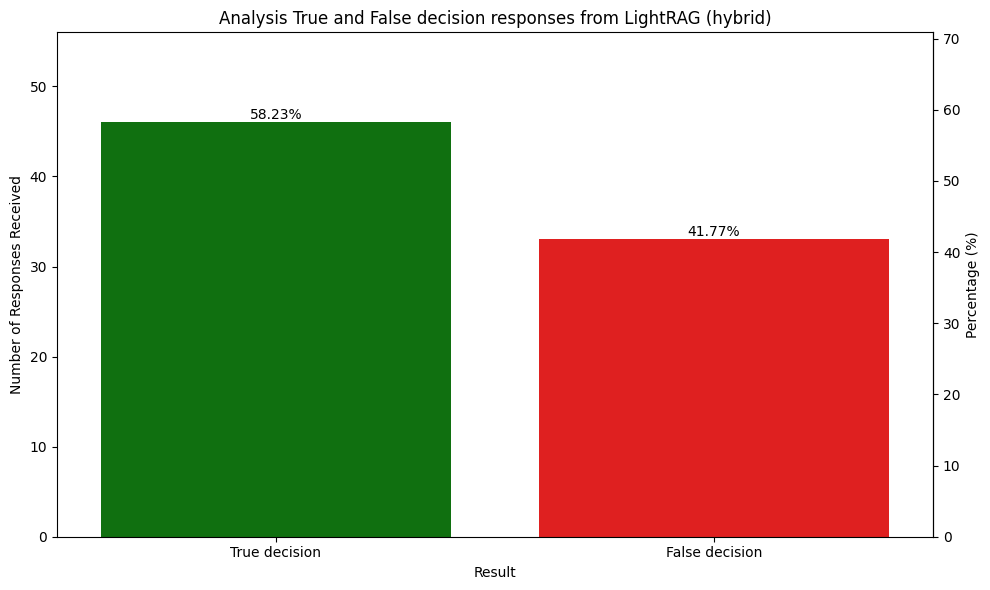

In [ ]:
sample_results = pd.Series(data=df['hybrid'])
fig = analyze_model_results(sample_results)
plt.show()

In [ ]:
frames = pd.read_csv("https://raw.githubusercontent.com/comindspace/noosphere/refs/heads/main/prepared_data/frames.csv")

In [ ]:
reason_type=pd.DataFrame({
    'Multiple Constraints': frames['reasoning_types'].str.contains('Multiple constraints').astype(int),
    'Numerical Reasoning': frames['reasoning_types'].str.contains('Numerical reasoning').astype(int),
    'Post Processing': frames['reasoning_types'].str.contains('Post processing').astype(int),
    'Tabular Reasoning': frames['reasoning_types'].str.contains('Tabular reasoning').astype(int),
    'Temporal Reasoning': frames['reasoning_types'].str.contains('Temporal reasoning').astype(int)
}).copy()

In [ ]:
decision_with_reason_type=pd.concat([df['hybrid'], reason_type.loc[0:79]], axis=1)
decision_with_reason_type=decision_with_reason_type.dropna()

In [ ]:
true_counts = decision_with_reason_type.loc[df['hybrid']==True, ['Multiple Constraints', 'Numerical Reasoning','Post Processing', 'Tabular Reasoning', 'Temporal Reasoning']].sum()
false_counts = decision_with_reason_type.loc[df['hybrid'] == False, ['Multiple Constraints', 'Numerical Reasoning', 'Post Processing', 'Tabular Reasoning', 'Temporal Reasoning']].sum()

In [ ]:
comparison_df = pd.DataFrame({
    'False decision': false_counts,
    'True decision': true_counts
}, index=['Multiple Constraints', 'Numerical Reasoning', 'Post Processing','Tabular Reasoning','Temporal Reasoning'])

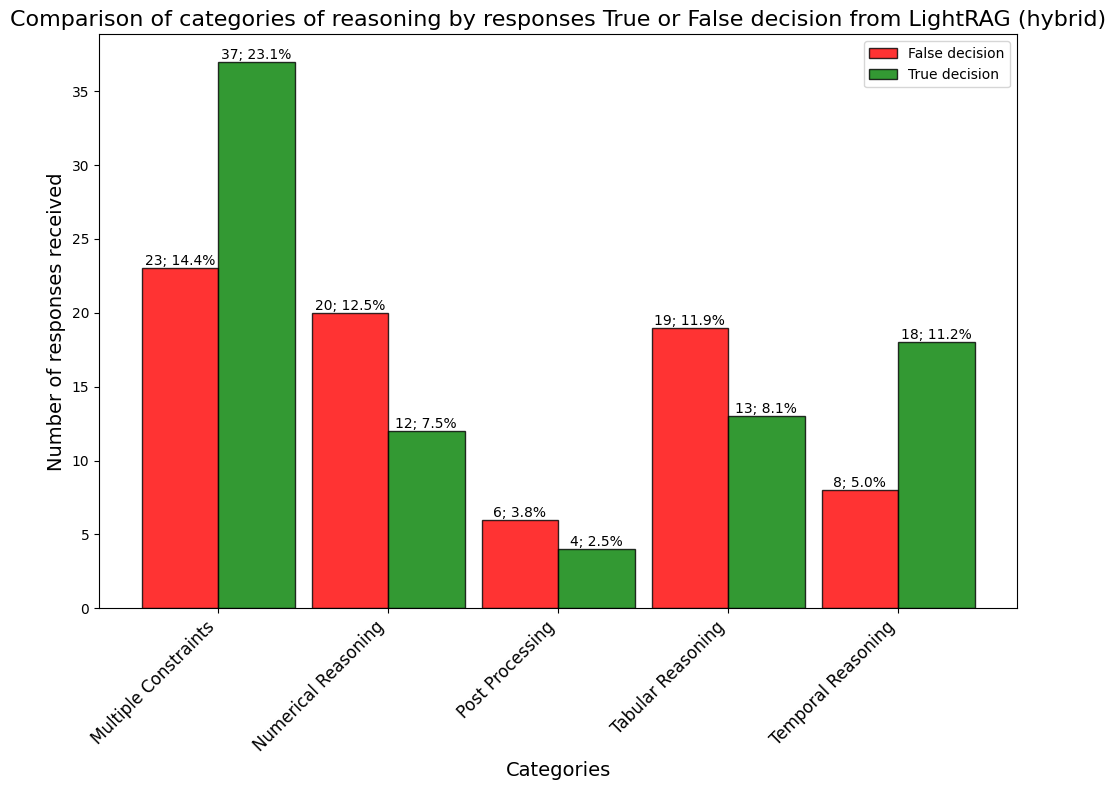

In [ ]:
colors = ['red' if 'False' in col else 'green' for col in comparison_df.columns]

ax = comparison_df.plot(
    kind='bar',
    figsize=(10, 8),
    alpha=0.8,
    edgecolor='black',
    color=colors,
    width=0.9
)
plt.title('Comparison of categories of reasoning by responses True or False decision from LightRAG (hybrid)', fontsize=16)
plt.ylabel('Number of responses received', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Categories', fontsize=14)

total = comparison_df.sum().sum()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = f'{(height / total) * 100:.1f}%'
        count = f'{int(height)}'
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height,
            f'{count}; {percentage}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()

In [ ]:
a=frames[['wikipedia_link_1', 'wikipedia_link_2','wikipedia_link_3','wikipedia_link_4','wikipedia_link_5','wikipedia_link_6', 'wikipedia_link_7','wikipedia_link_8','wikipedia_link_9','wikipedia_link_10','wikipedia_link_11+']]

In [ ]:
def create_non_null_column_counts(df):
    non_null_counts = []
    for i in range(len(df)):
        row = df.iloc[i]
        non_null_counts.append(row.notna().sum())

    return pd.DataFrame({'links_num': non_null_counts})

In [ ]:
num_links=create_non_null_column_counts(a)

In [ ]:
decision_with_reason_type_with_num_links=pd.concat([decision_with_reason_type, num_links.loc[0:79]], axis=1)

In [ ]:
decision_with_reason_type_with_num_links=decision_with_reason_type_with_num_links.dropna()

In [ ]:
filtered_counts_true = decision_with_reason_type_with_num_links[decision_with_reason_type_with_num_links['hybrid'] == True].groupby('links_num')['hybrid'].count()

In [ ]:
filtered_counts_false = decision_with_reason_type_with_num_links[decision_with_reason_type_with_num_links['hybrid'] == False].groupby('links_num')['hybrid'].count()

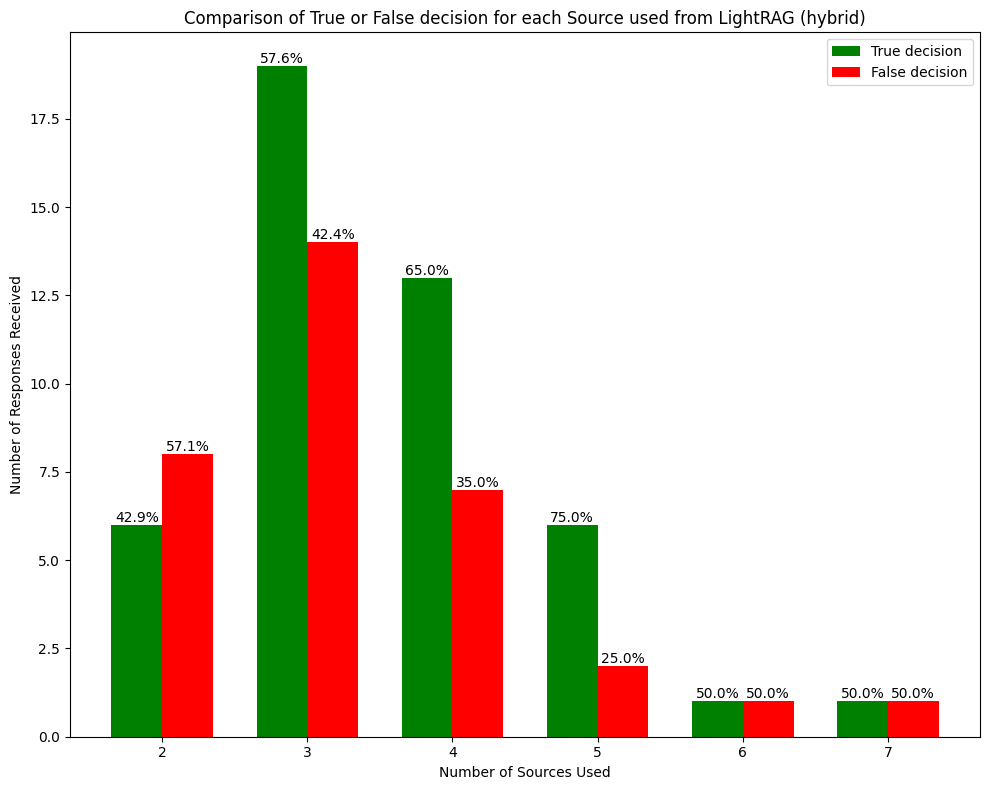

In [ ]:
total_counts = filtered_counts_true.add(filtered_counts_false, fill_value=0)
percent_true = (filtered_counts_true / total_counts * 100).fillna(0)
percent_false = (filtered_counts_false / total_counts * 100).fillna(0)

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35
x = np.arange(len(total_counts))

bars_true = ax.bar(x, filtered_counts_true.reindex(total_counts.index, fill_value=0).values,
                   width=bar_width, color='green', label='True decision')
bars_false = ax.bar(x + bar_width, filtered_counts_false.reindex(total_counts.index, fill_value=0).values,
                    width=bar_width, color='red', label='False decision')

for bar, percent in zip(bars_true, percent_true.reindex(total_counts.index, fill_value=0)):
    if bar.get_height() > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percent:.1f}%',
                ha='center', va='bottom')

for bar, percent in zip(bars_false, percent_false.reindex(total_counts.index, fill_value=0)):
    if bar.get_height() > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percent:.1f}%',
                ha='center', va='bottom')

ax.set_xlabel('Number of Sources Used')
ax.set_ylabel('Number of Responses Received')
ax.set_title('Comparison of True or False decision for each Source used from LightRAG (hybrid)')
ax.legend()

all_index = total_counts.index
plt.xticks(x + bar_width / 2, all_index)

plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = ['Multiple Constraints', 'Numerical Reasoning', 'Post Processing',
                   'Tabular Reasoning', 'Temporal Reasoning', 'links_num']

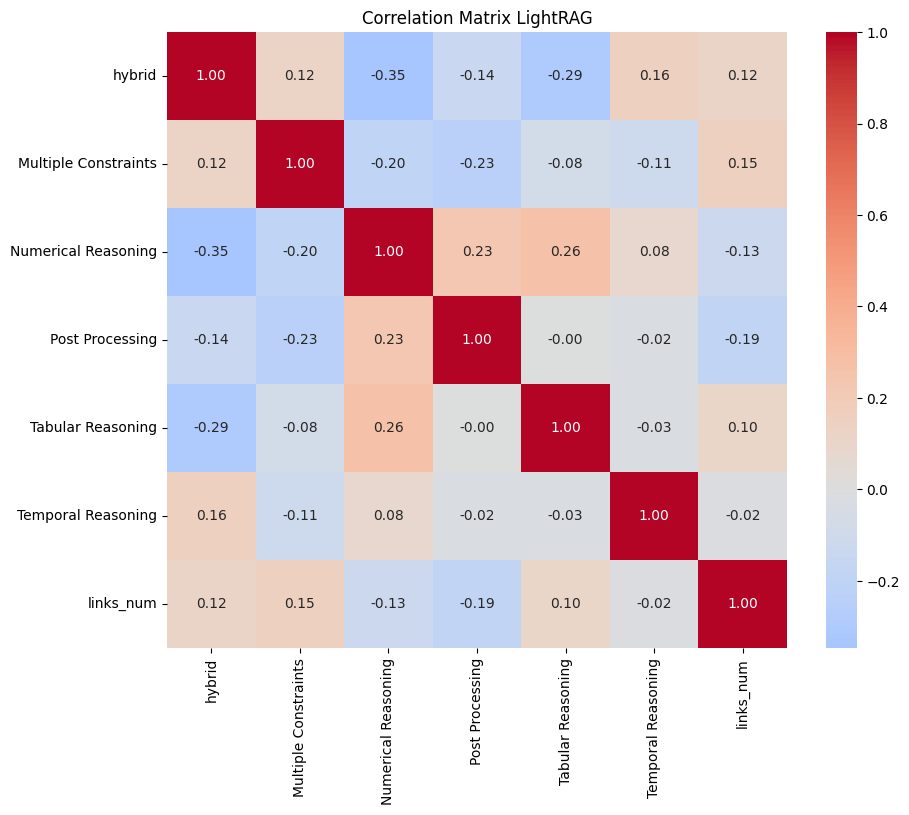

In [ ]:
decision_with_reason_type_with_num_links['hybrid'] = decision_with_reason_type_with_num_links['hybrid'].astype(int)

correlation_matrix_with_decision = decision_with_reason_type_with_num_links[['hybrid'] + numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_decision, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix LightRAG')
plt.show()

In [ ]:
grouped_data = decision_with_reason_type_with_num_links.groupby('links_num')['hybrid'].sum()

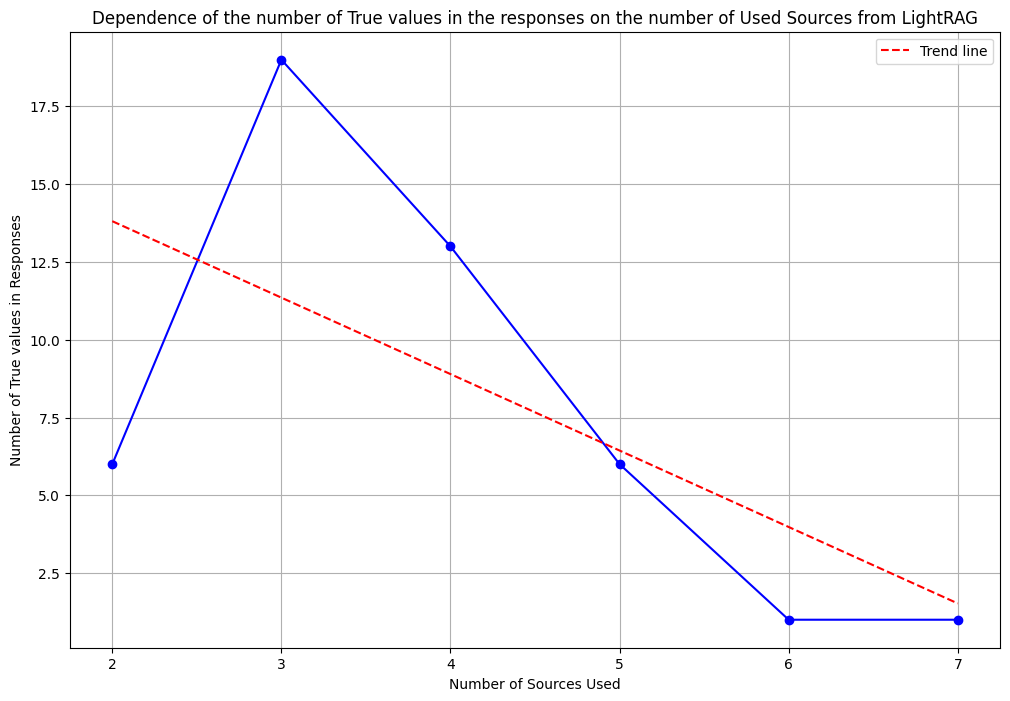

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Sources Used')
plt.ylabel('Number of True values in Responses')
plt.title('Dependence of the number of True values ​​in the responses on the number of Used Sources from LightRAG')
plt.grid(True)

z = np.polyfit(grouped_data.index, grouped_data.values, 1)
p = np.poly1d(z)
plt.plot(grouped_data.index, p(grouped_data.index), linestyle='--', color='r', label='Trend line')
plt.legend()

plt.show()